See call_so.ipynb for information on compiling.

In [22]:
# needed for C stdout
%load_ext wurlitzer

import ctypes as ct
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd;import os

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [2]:
# load xpp api compiled with libX11.so
xppa = ct.cdll.LoadLibrary('../xpp_source/libxppAPI.so')

# figure out how to initialize input array in python to pass into c
arr = (ct.c_char_p*3)()
home = os.path.expanduser("~")
arr[0] = (home+'/Dropbox/xpp-py/xpp_source/xppaut').encode('utf-8')
arr[1] = (home+'/Dropbox/xpp-py/xpp_source/ode/lecar.ode').encode('utf-8')
arr[2] = '-silent'.encode('utf-8')

In [42]:
def get_auto_output():
    # get AUTO output
    home = os.path.expanduser('~')
    with open(home+'/fort.7') as f:
        lines = f.readlines()
    lines = lines[12:] # strip headers

    data = np.zeros((len(lines),len(lines[0].split())-1))
    for j,line in enumerate(lines):
        cols = line.split()
        floats = [float(i) for i in cols] 
        data[j,:] = floats[1:] # ignore first col
        
    return data
    
#get_auto_output()

In [3]:
xppa.do_main_py(3,arr)

argv[0] = /home/youngmp/Dropbox/xpp-py/xpp_source/xppaut
argv[1] = /home/youngmp/Dropbox/xpp-py/xpp_source/ode/lecar.ode
argv[2] = -silent
myfile=lecar.ode
batchout=output.dat
PlotFormat=ps
text=                Channnels for the ML Eqns   
text= The ML eqns have three channels Calcium, potassium and leak.    
text= To set parameters click on the asterisks   
text=*  We first set the integration time to 100 and increase the current   
action=$ total=100 iapp=.1  
text= Integrate the equations and see the nice limit cycle. Draw the nullclines.   
text=*  Now we block potassium. Integrate again and look at what happens   
action=$ gk=0  
text= Draw the nullclines. Where is the V nullcline?   
text=*  Now we block both currents and integrate   
action=$ gk=0 gca=0  
text=*  Now calcium is blocked. Explore this   
action=$ gk=2 gca=0  
text=*  Back to normal.  Both currents are required for oscillations!   
action=$ gk=2 gca=1.33  
text=*   What happens with no leak???    
action=$ gl=0  
P

0

In [4]:
# The helper function "ndpointer" can declare the expected type
# and either number of dimensions expected or the shape of the
# numpy array.  ctypes will then require that array and type check
# the parameter. 
xppa.integrate_once_py.argtypes = np.ctypeslib.ndpointer(dtype=ct.c_float,ndim=1),
xppa.integrate_once_py.restype = None

xppa.get_ic.argtypes = [ct.c_int,np.ctypeslib.ndpointer(dtype=ct.c_float,ndim=1)]

init_c = np.array([.01,-1],dtype=ct.c_float)

# run sim
xppa.integrate_once_py(init_c)

In [5]:
# get data from xpp
maxrow = xppa.get_maxrow_browser();maxcol = xppa.get_maxcol_browser()
data_all = np.zeros((maxrow,maxcol))
for i in range(maxcol):
    col_dat_addr = xppa.get_data_col(i)
    data_all[:,i] = list(ct.cast(col_dat_addr,ct.POINTER(ct.c_float*maxrow)).contents)

In [6]:
# get last point and run again to update last_ic
last = data_all[-1,1:]
last = last.astype(np.float32)
xppa.integrate_once_py(last)

In [7]:
## plot if you want to
# fig,axs = plt.subplots(1,1)
# axs.plot(data_all[:,0],data_all[:,1]);axs.plot(data_all[:,0],data_all[:,2])
# plt.show()

do_auto_win() (auto_nox.c) calls make_auto(wname,iname) (auto_x11.c), which sets up the auto window.

In [8]:
xppa.auto_run_py() # in auto_nox.c

init for auto -0.495617,0.000270382 
  BR    PT  TY LAB    PAR(0)        L2-NORM         U(1)          U(2)     
   1     1  EP   1  0.000000E+00  4.956169E-01 -4.956168E-01  2.703817E-04
   1    14  LP   2  8.325657E-02  2.450622E-01 -2.449143E-01  8.514462E-03
   1    29  LP   3 -2.072714E-02  1.406626E-01 -3.369752E-02  1.365667E-01
   1    48  HB   4  2.038448E-01  4.025181E-01  6.953479E-02  3.964665E-01


1

   1    66  EP   5  5.105744E-01  5.896349E-01  1.224442E-01  5.767814E-01


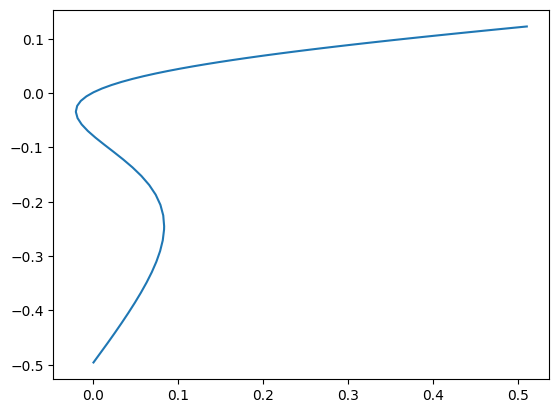

In [46]:
# plot
data = get_auto_output()
fig,axs = plt.subplots(1,1)
axs.plot(data[:,3],data[:,5])
plt.show();plt.close()